In [ ]:
## @see https://www.kaggle.com/toorkp/churn-wsdm/data

In [14]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import numpy as np
import pandas as pd
import time
import gc; gc.enable()
import time
import sys

from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, f1_score, log_loss, confusion_matrix
from sklearn.neural_network import MLPClassifier

from collections import Counter
from numpy.random import RandomState
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

pd.options.display.float_format = "{:.2f}".format
np.set_printoptions(precision=4)

import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('modules')

from shared_functions import *

In [8]:
# Load the pre-split data

store = pd.HDFStore('/home/dissertation/data/base_abt_split.h5')
X_train, X_test, y_train, y_test = store['X_train'], store['X_test'], store['y_train'], store['y_test']
store.close()

# Drop msno from the dataset
X_train.drop(['msno', 'registration_init_time', 'registration_init_time_dt'], inplace=True, axis=1)
X_test.drop(['msno', 'registration_init_time', 'registration_init_time_dt'], inplace=True, axis=1)

print("Train Shape:", X_train.shape, y_train.shape)
print("Train Shape:", X_test.shape, y_test.shape)
X_train.head()

Train Shape: (600803, 13) (600803,)
Train Shape: (257487, 13) (257487,)


,city,bd,registered_via,total_order,payment_method_id_mode,payment_method_id_count,payment_plan_days_mode,payment_plan_days_mean,plan_list_price_mean,plan_lifetime_value,is_auto_renew_mode,transaction_date_max,cancel_times
703741,4,32,3,22,33,1,30,21.82,108.36,2384.00,True,20170228,0
228194,13,33,3,19,39,1,30,28.58,141.16,2682.00,True,20170131,0
735733,15,22,3,17,40,3,30,30.00,158.12,2688.00,True,20170210,4
774256,1,0,7,26,41,1,30,28.85,143.27,3725.00,True,20170205,0
282188,1,0,7,27,41,1,30,28.89,132.00,3564.00,True,20170216,1


In [10]:
RANDOM_STATE = 42 
CV_ITER = 3
SCORING_METRIC = autosklearn.metrics.recall

## Set the list of the categorical columns in the dataset
cat_col = ['city', 'registered_via', 'payment_method_id_mode']

df_cols = X_train.columns
feat_types =  ['Categorical' if col in cat_col else 'Numerical' for col in df_cols]

## Each entry in the list is a Tuple of
##   [ModelName, Model, HyperParams, ScoringMetric]

classifiers = [
        ('ASKLEARN', 
         autosklearn.classification.AutoSklearnClassifier(
                time_left_for_this_task=int(3600*.25), 
                n_jobs=8,
                include_estimators=["random_forest", "decision_tree", "adaboost", "gaussian_nb",
                                    "liblinear_svc", "xgradient_boosting"], 
                exclude_estimators=None,
                include_preprocessors=["no_preprocessing", ], 
                exclude_preprocessors=None), {}, 
         SCORING_METRIC)
]

In [11]:
all_metrics = pd.DataFrame()
all_metrics

""


### Experiment 1.1 Baseline - Default Settings - No sampling

Model Build Iteration 0
PRE-SAMPLING: (600803, 13) (600803,) Counter({0: 544661, 1: 56142})
POST-SAMPLING: (600803, 13) (600803,) Counter({0: 544661, 1: 56142})
Set the train df types correctly based on the test set
Applying normalisation to train and test sets
No categorical columns provided for OHE
No categorical columns provided for OHE
X_train:  (600803, 13) (600803, 1)
X_test:  (257487, 13) (257487, 1)


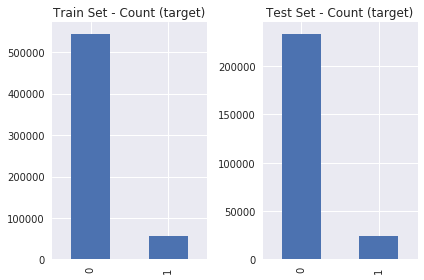

Building ASKLEARN classifier
No params set, using Standard training


/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/

[WARNING] [2019-07-26 21:12:29,651:EnsembleBuilder(1791095845):199e64f1448877c8dc377def3a1de95b] No models better than random - using Dummy Score!
[WARNING] [2019-07-26 21:12:30,543:EnsembleBuilder(1791095845):199e64f1448877c8dc377def3a1de95b] No models better than random - using Dummy Score!
[WARNING] [2019-07-26 21:12:32,548:EnsembleBuilder(1791095845):199e64f1448877c8dc377def3a1de95b] No models better than random - using Dummy Score!
[WARNING] [2019-07-26 21:12:34,560:EnsembleBuilder(1791095845):199e64f1448877c8dc377def3a1de95b] No models better than random - using Dummy Score!


/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/

[WARNING] [2019-07-26 21:17:44,634:EnsembleBuilder(1791095845):199e64f1448877c8dc377def3a1de95b] Memory Exception -- restart with less ensemle_nbest: 25


/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/

[WARNING] [2019-07-26 21:23:04,635:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2019-07-26 21:23:04,635:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-07-26 21:27:14,535:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2019-07-26 21:27:14,535:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
-1
['/tmp/autosklearn_tmp_3204_4588/.auto-sklearn/ensembles/1791095845.0000000000.ensemble', '/tmp/autosklearn_tmp_3204_4588/.auto-sklearn/ensembles/1791095845.0000000001.ensemble', '/tmp/autosklearn_tmp_3204_4588/.auto-sklearn/ensembles/1791095845.0000000002.ensemble', '/tmp/autosklearn_tmp_3204_4588/.auto-sklearn/ensembles/1791095845.0000000003.ensemble', '/tmp/autosklearn_tmp_3204_4588/.auto-sklearn/ensembles/1791095845.0000000004.ensemble', '/tmp/autosklearn_tmp_3204_4588/.auto-sklearn/ensembles/1791095845.0000000005.ensemble']


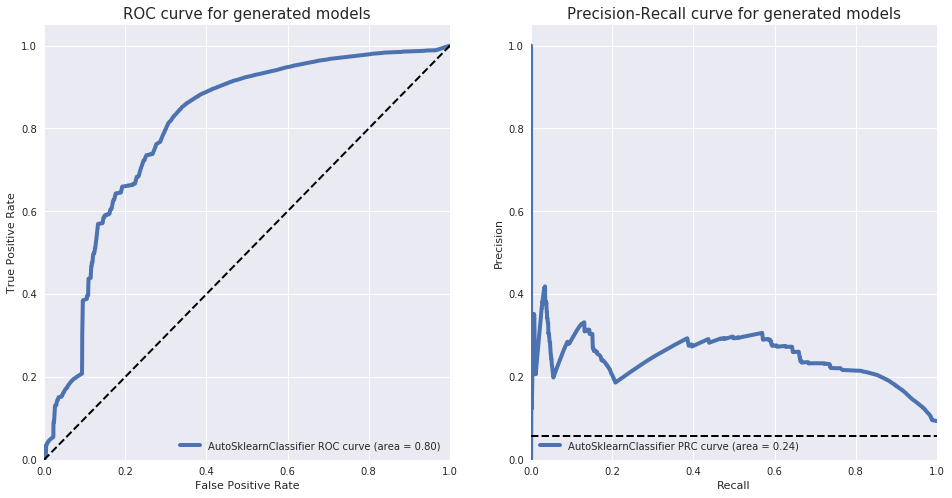

CPU times: user 25.2 s, sys: 2.61 s, total: 27.8 s
Wall time: 15min 1s


In [18]:
%%time

sampler = ('None', DummySampler())

exp_metrics = perform_experiment(X_train, X_test, y_train, y_test, classifiers, sampler, 1, 
                                 RANDOM_STATE, cv_iter=None, cat_col = None, feat_defs = feat_types)

all_metrics = all_metrics.append(exp_metrics)

In [ ]:
# automl.sprint_statistics()

In [20]:
all_metrics.sort_values('f1_score', ascending=False)

,classifier,sampling_method,tn,fn,tp,fp,accuracy,precision,recall,neg_recall,f1_score,log_loss,time_taken,aucroc,auprc,balanced_accuracy,cv_score_mean,cv_score_std,model_churn_cost,sample
0,AutoSklearnClassifier,None,155702,3746,20315,77724,0.68,0.21,0.84,0.67,0.33,10.93,899.06,0.80,0.24,0.76,-1,-1,11676900,0


### Experiment 1.2 Baseline - Default Settings - Oversampled training set 100%

In [ ]:
sampler = ('ROS 1:1', RandomOverSampler(random_state=RANDOM_STATE))

exp_metrics = perform_experiment(base_dataset, classifiers, sampler, 1, RANDOM_STATE, cv_iter=CV_ITER)

all_metrics = all_metrics.append(exp_metrics)

### Experiment 1.3 Baseline - Default Settings - Undersampled training set

In [ ]:
sampler = ('RUS 1:1', RandomUnderSampler(random_state=RANDOM_STATE))

exp_metrics = perform_experiment(base_dataset, classifiers, sampler, 1, RANDOM_STATE, cv_iter=CV_ITER)

all_metrics = all_metrics.append(exp_metrics)

### Experiment 1.4 Baseline - Default Settings - Over sampling - 33% of majority size

In [ ]:
sampler = ('ROS 3:1', RandomOverSampler(random_state=RANDOM_STATE, sampling_strategy = 1/3))

exp_metrics = perform_experiment(base_dataset, classifiers, sampler, 1, RANDOM_STATE, cv_iter=CV_ITER)

all_metrics = all_metrics.append(exp_metrics)

### Experiment 1.5 Baseline - Default Settings - Over sampling - 66% of majority size

In [ ]:
sampler = ('ROS 3:2', RandomOverSampler(random_state=RANDOM_STATE, sampling_strategy = 2/3))

exp_metrics = perform_experiment(base_dataset, classifiers, sampler, 1, RANDOM_STATE, cv_iter=CV_ITER)

all_metrics = all_metrics.append(exp_metrics)

### Experiment 1.6 Baseline - Default Settings - Over sampling - 50% of majority size

In [ ]:
sampler = ('ROS 2:1', RandomOverSampler(random_state=RANDOM_STATE, sampling_strategy = 1/2))

exp_metrics = perform_experiment(base_dataset, classifiers, sampler, 1, RANDOM_STATE, cv_iter=CV_ITER)

all_metrics = all_metrics.append(exp_metrics)

### Experiment 1.7 Baseline Default Settings SMOTE-NC

In [ ]:

sampler = ('SMOTE_NC', SMOTENC(random_state=RANDOM_STATE, categorical_features=[0,1,2,3,4,5,6,7,12,13], n_jobs=8))

## Keep the following, essentially dropping the dt columns
cols = ['is_churn', 'city', 'bd', 'registered_via', 'total_order',
       'payment_method_id_mode', 'payment_method_id_count',
       'payment_plan_days_mode', 'payment_plan_days_mean',
       'plan_list_price_mean', 'plan_lifetime_value', 'actual_amount_mean',
       'total_actual_amount', 'is_auto_renew_mode', 'cancel_times']

exp_metrics = perform_experiment(base_dataset[cols], classifiers, sampler, 1, RANDOM_STATE, cv_iter=CV_ITER)

all_metrics = all_metrics.append(exp_metrics)

In [ ]:
all_metrics.sort_values('aucroc', ascending=False).head(15)

In [ ]:
## Just try an SVM 
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

In [ ]:
%%time
model_train_results = train_model(base_dataset, sampling_method = 'under', classifiers = [('SGDClassifier', SGDClassifier(loss='log'))])

In [ ]:
## Print the feature importance 

feature_index = np.flip(np.argsort(model.feature_importances_), axis=0)
ordered_features = []
column_names = X_test.columns

for i in feature_index[0:10]:
    print(np.round(model.feature_importances_[i], 3), ' --> ', column_names[i])
    ordered_features.append(column_names[i])

In [ ]:
## Print the permutation importance 

import eli5
from eli5.sklearn import PermutationImportance

_, X_test, _, y_test = prepare_train_test_split(model_dataset, 0)

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)

eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [ ]:
#model_name, model = model_train_results[1][2]

for model_name, model in model_train_results[1]:
    probs = model.predict_proba(X_test)[:, 1]
    pr_data = plot_precision_recall(
        y_test, probs, title='PR Curve for {0}'.format(model_name))

In [ ]:
probs = model.predict_proba(X_test)[:, 1]
pr_data = plot_precision_recall(
    y_test, probs, title='PR Curve for {0}'.format(model_name))

In [ ]:
pr_data = plot_roc(
    y_test, probs, title='ROC Curve for {0}'.format(model_name))

In [ ]:
print(plt.style.available)

In [ ]:
model_dataset.head()

In [ ]:
print("Original Data distribution")
print(model_dataset['is_churn'].value_counts())

In [ ]:
# Display new class counts
print('Sci-Kit Learn : resample : Down Sampled data set')
train_downsample = undersampled_dataset(model_dataset, 'is_churn')

print(train_downsample['is_churn'].value_counts())
print("Num records = ", train_downsample.shape[0])
train_downsample.is_churn.value_counts().plot(kind='bar', title='Count (target)')

In [ ]:
# Display new class counts
print('Sci-Kit Learn : resample : Up Sampled data set')
train_upsample = oversampled_dataset(model_dataset, 'is_churn')

print(train_upsample['is_churn'].value_counts())
print("Num records = ", train_upsample.shape[0])
train_upsample.is_churn.value_counts().plot(kind='bar', title='Count (target)')

In [ ]:
probs = model.predict_proba(X_test)[:, 1]
pr_data = plot_precision_recall(
    y_test, probs, title='Precision-Recall Curve for Random Forest')

In [ ]:
precision_above = pr_data.loc[pr_data['precision'] >= 0.25].copy()
precision_above.sort_values('recall', ascending=False, inplace=True)
precision_above.head()

In [ ]:
threshold_required = 0.5
# Make predictions where probability is above threshold
preds = np.zeros(len(y_test))
preds[probs >= threshold_required] = 1

# Make and plot confusion matrix
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm, classes=['No Churn', 'Churn'],
                      title='Churn Confusion Matrix')

In [ ]:
model_dataset.head()

In [ ]:
fi = pd.DataFrame({'importance': model.feature_importances_}, index=model_dataset.iloc[:, 1:].columns).\
    sort_values('importance', ascending=False)
fi.head(10)